In [1]:
# Import Pandas, Matplotlib, and Numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size=1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

1. Import out dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop thorough the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cfd4bcdd8a6b48e067aa7a3a6d783fcd


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50): # To check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Records {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Records 1 of Set 1 | saint george
Processing Records 2 of Set 1 | ushuaia
Processing Records 3 of Set 1 | mataura
Processing Records 4 of Set 1 | punta arenas
Processing Records 5 of Set 1 | temaraia
City not found. Skipping...
Processing Records 6 of Set 1 | rocha
Processing Records 7 of Set 1 | tiksi
Processing Records 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Records 9 of Set 1 | grand river south east
City not found. Skipping...
Processing Records 10 of Set 1 | busselton
Processing Records 11 of Set 1 | that phanom
Processing Records 12 of Set 1 | hithadhoo
Processing Records 13 of Set 1 | palmer
Processing Records 14 of Set 1 | porto santo
Processing Records 15 of Set 1 | bethel
Processing Records 16 of Set 1 | bluff
Processing Records 17 of Set 1 | andes
Processing Records 18 of Set 1 | cape town
Processing Records 19 of Set 1 | astoria
Processing Records 20 of Set 1 | nanortalik
Proce

Processing Records 34 of Set 4 | oume
Processing Records 35 of Set 4 | forestville
Processing Records 36 of Set 4 | faanui
Processing Records 37 of Set 4 | thompson
Processing Records 38 of Set 4 | atuona
Processing Records 39 of Set 4 | isabela
Processing Records 40 of Set 4 | leh
Processing Records 41 of Set 4 | lompoc
Processing Records 42 of Set 4 | esperance
Processing Records 43 of Set 4 | pisco
Processing Records 44 of Set 4 | tazovskiy
Processing Records 45 of Set 4 | zhuhai
Processing Records 46 of Set 4 | sri aman
Processing Records 47 of Set 4 | taiyuan
Processing Records 48 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Records 49 of Set 4 | togur
Processing Records 50 of Set 4 | mehamn
Processing Records 1 of Set 5 | ketchikan
Processing Records 2 of Set 5 | kamenskoye
City not found. Skipping...
Processing Records 3 of Set 5 | champerico
Processing Records 4 of Set 5 | hajnowka
Processing Records 5 of Set 5 | beloha
Processing Records 6 of Set 5 | airai
P

Processing Records 19 of Set 8 | agua buena
Processing Records 20 of Set 8 | dali
Processing Records 21 of Set 8 | cockburn town
Processing Records 22 of Set 8 | jibuti
Processing Records 23 of Set 8 | ipubi
Processing Records 24 of Set 8 | neuquen
Processing Records 25 of Set 8 | ust-nera
Processing Records 26 of Set 8 | broken hill
Processing Records 27 of Set 8 | kalmunai
Processing Records 28 of Set 8 | ilhabela
Processing Records 29 of Set 8 | schwandorf
Processing Records 30 of Set 8 | vardo
Processing Records 31 of Set 8 | chebsara
Processing Records 32 of Set 8 | buraydah
Processing Records 33 of Set 8 | superior
Processing Records 34 of Set 8 | springfield
Processing Records 35 of Set 8 | husavik
Processing Records 36 of Set 8 | mabay
Processing Records 37 of Set 8 | havre-saint-pierre
Processing Records 38 of Set 8 | kjollefjord
Processing Records 39 of Set 8 | bintulu
Processing Records 40 of Set 8 | los llanos de aridane
Processing Records 41 of Set 8 | marcona
City not fou

Processing Records 5 of Set 12 | passo de camaragibe
Processing Records 6 of Set 12 | mangrol
Processing Records 7 of Set 12 | poum
Processing Records 8 of Set 12 | alta floresta
Processing Records 9 of Set 12 | coihaique
Processing Records 10 of Set 12 | chapais
Processing Records 11 of Set 12 | bud
Processing Records 12 of Set 12 | almaznyy
Processing Records 13 of Set 12 | san carlos de bariloche
Processing Records 14 of Set 12 | inderborskiy
City not found. Skipping...
Processing Records 15 of Set 12 | san jeronimo
Processing Records 16 of Set 12 | alotau
City not found. Skipping...
Processing Records 17 of Set 12 | mogok
Processing Records 18 of Set 12 | bularit
Processing Records 19 of Set 12 | ustyuzhna
Processing Records 20 of Set 12 | ouadda
Processing Records 21 of Set 12 | waynesboro
Processing Records 22 of Set 12 | gizo
Processing Records 23 of Set 12 | deputatskiy
Processing Records 24 of Set 12 | ituverava
Processing Records 25 of Set 12 | mayor pablo lagerenza
Processin

In [8]:
len(city_data)

565

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.10,-113.58,80.60,13,1,3.36,US,2020-05-04 03:26:50
1,Ushuaia,-54.80,-68.30,39.20,69,75,14.99,AR,2020-05-04 03:24:02
2,Mataura,-46.19,168.86,45.46,91,100,7.99,NZ,2020-05-04 03:28:19
3,Punta Arenas,-53.15,-70.92,35.60,93,99,6.93,CL,2020-05-04 03:28:19
4,Rocha,-34.48,-54.33,50.49,89,10,4.74,UY,2020-05-04 03:27:26
5,Tiksi,71.69,128.87,24.44,93,43,8.75,RU,2020-05-04 03:28:19
6,Busselton,-33.65,115.33,69.01,71,100,23.89,AU,2020-05-04 03:28:20
7,That Phanom,16.94,104.71,91.40,74,75,4.70,TH,2020-05-04 03:28:20
8,Hithadhoo,-0.60,73.08,85.77,73,100,12.26,MV,2020-05-04 03:28:20
9,Palmer,42.16,-72.33,61.00,71,75,0.92,US,2020-05-04 03:28:20


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint George,US,2020-05-04 03:26:50,37.10,-113.58,80.60,13,1,3.36
1,Ushuaia,AR,2020-05-04 03:24:02,-54.80,-68.30,39.20,69,75,14.99
2,Mataura,NZ,2020-05-04 03:28:19,-46.19,168.86,45.46,91,100,7.99
3,Punta Arenas,CL,2020-05-04 03:28:19,-53.15,-70.92,35.60,93,99,6.93
4,Rocha,UY,2020-05-04 03:27:26,-34.48,-54.33,50.49,89,10,4.74
5,Tiksi,RU,2020-05-04 03:28:19,71.69,128.87,24.44,93,43,8.75
6,Busselton,AU,2020-05-04 03:28:20,-33.65,115.33,69.01,71,100,23.89
7,That Phanom,TH,2020-05-04 03:28:20,16.94,104.71,91.40,74,75,4.70
8,Hithadhoo,MV,2020-05-04 03:28:20,-0.60,73.08,85.77,73,100,12.26
9,Palmer,US,2020-05-04 03:28:20,42.16,-72.33,61.00,71,75,0.92


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time

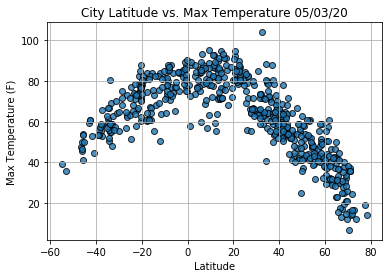

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

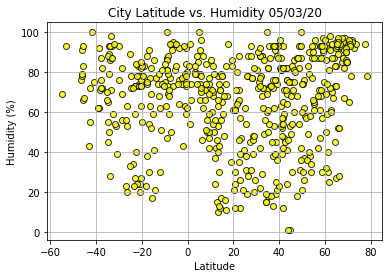

In [19]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="yellow")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

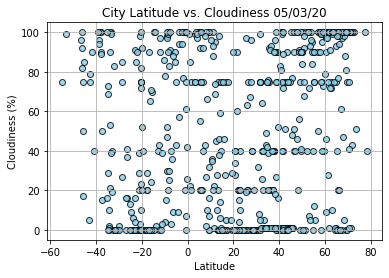

In [23]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="skyblue")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

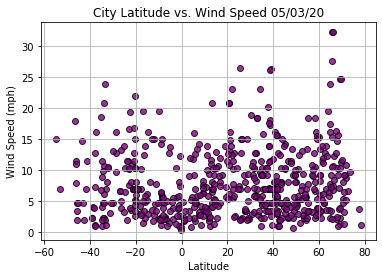

In [24]:
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities", c="purple")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()